# t-Distributed Stochastic Neighbor Embedding (t-SNE) in sklearn

Originated from [AlexanderFabisch Github](https://nbviewer.jupyter.org/urls/gist.githubusercontent.com/AlexanderFabisch/1a0c648de22eff4a2a3e/raw/59d5bc5ed8f8bfd9ff1f7faa749d1b095aa97d5a/script/urls/gist.githubusercontent.com/AlexanderFabisch/1a0c648de22eff4a2a3e/raw/59d5bc5ed8f8bfd9ff1f7faa749d1b095aa97d5a/t-SNE.ipynb)

t-SNE is a tool for **data visualization**. It reduces the dimensionality of data to 2 or 3 dimensions so that it can be plotted easily. Local similarities are preserved by this embedding.

t-SNE converts distances between data in the original space to probabilities.
At the end of the notebook you will find some math behind t-SNE, if you are interested.



In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np 
import random
import matplotlib
import matplotlib.cm as cm
import pandas as pd 
help(TSNE)

Help on class TSNE in module sklearn.manifold._t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  TSNE(n_components=2, *, perplexity=30.0, early_exaggeration=12.0, learning_rate='auto', n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', metric_params=None, init='pca', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=None, square_distances='deprecated')
 |  
 |  T-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSV

You can see that there is only one method for t-SNE: `fit_transform()`. This indicates that the algorithm can only be used for visualization, but not for any kind of prediction, because future data (test data, data in production) cannot be transformed according to the training data.

## A simple example: the Iris dataset

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X_tsne = TSNE(learning_rate=100).fit_transform(iris.data)
X_pca = PCA().fit_transform(iris.data)

t-SNE can help us to decide whether classes are separable in some linear or nonlinear representation. Here we can see that the 3 classes of the Iris dataset can be separated quite easily. They can even be separated linearly which we can conclude from the low-dimensional embedding of the `PCA`.

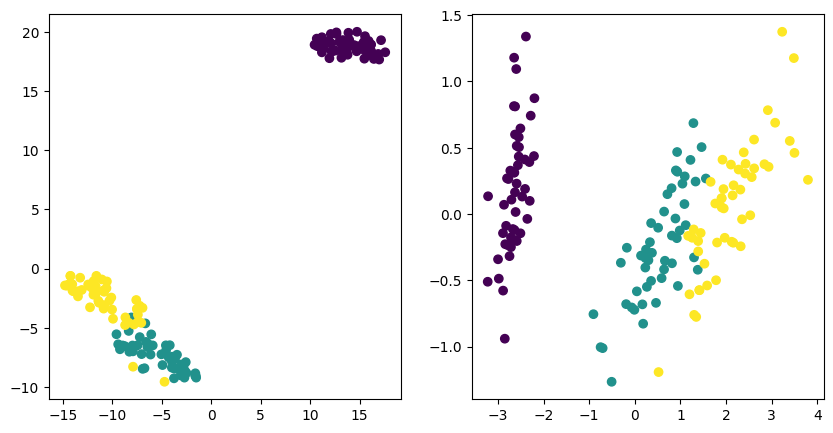

In [3]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target);

## High-dimensional sparse data: the 20 newsgroups dataset

In high-dimensional and nonlinear domains, PCA is not applicable any more and many other manifold learning algorithms do not yield good visualizations either because they try to preserve the global data structure.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset="train", categories=categories)
vectors = TfidfVectorizer().fit_transform(newsgroups.data)

In [21]:
print(repr(vectors))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 323433 stored elements and shape (2034, 34118)>


For high-dimensional sparse data it is helpful to first reduce the dimensions to 50 dimensions with `TruncatedSVD` and then perform t-SNE. This will usually improve the visualization.

In [22]:
from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)

In [23]:
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2034 samples in 0.001s...
[t-SNE] Computed neighbors for 2034 samples in 0.171s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2034
[t-SNE] Computed conditional probabilities for sample 2000 / 2034
[t-SNE] Computed conditional probabilities for sample 2034 / 2034
[t-SNE] Mean sigma: 0.107856
[t-SNE] Computed conditional probabilities in 0.173s
[t-SNE] Iteration 50: error = 73.4279861, gradient norm = 0.0004571 (50 iterations in 1.014s)
[t-SNE] Iteration 100: error = 73.0104218, gradient norm = 0.0022276 (50 iterations in 0.953s)
[t-SNE] Iteration 150: error = 72.8757782, gradient norm = 0.0000103 (50 iterations in 1.319s)
[t-SNE] Iteration 200: error = 72.8753815, gradient norm = 0.0000063 (50 iterations in 0.878s)
[t-SNE] Iteration 250: error = 72.8753815, gradient norm = 0.0000121 (50 iterations in 0.916s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.875381
[t-SNE] Iteration 300: err

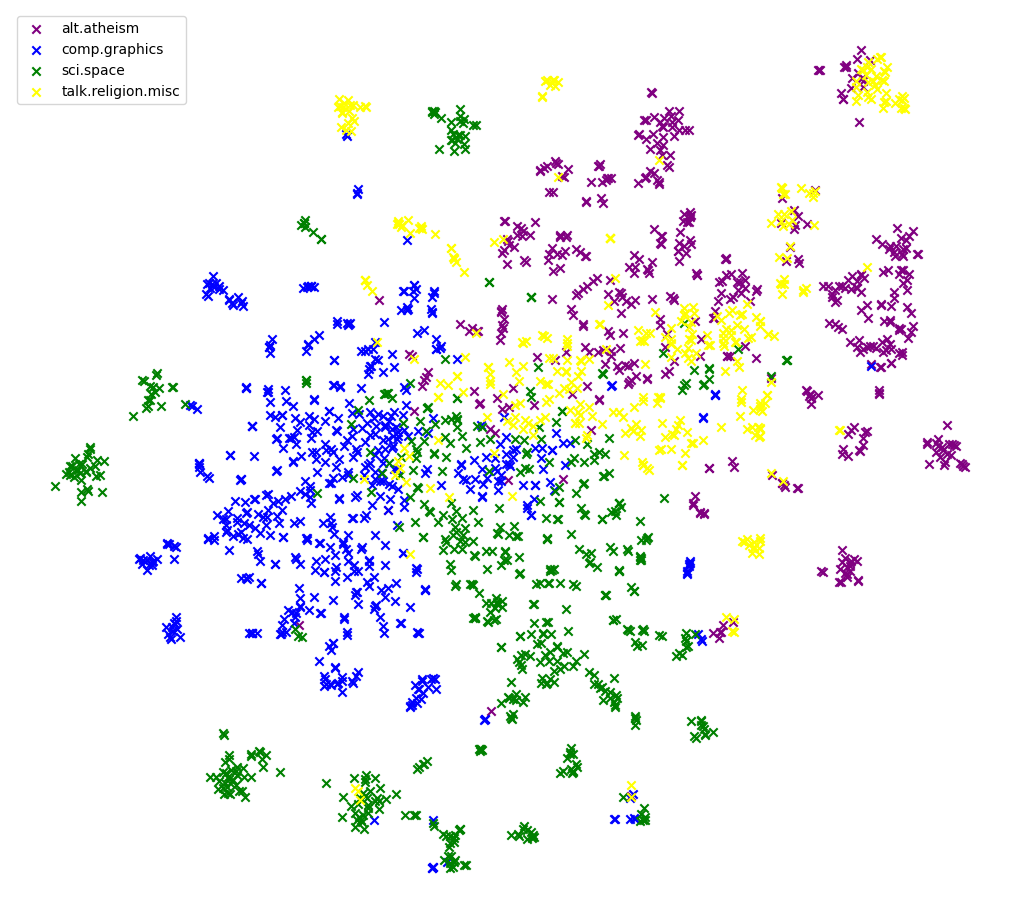

In [24]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
colors = ['purple', 'blue', 'green', 'yellow']
for i in range(4):
    indices = np.argwhere(newsgroups.target == i)
    ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], c=colors[i], 
                marker="x", label=newsgroups.target_names[i])
ax.legend()
plt.show();

# MNIST dataset

Let's also have a look at the popular MNIST dataset and use t-SNE to visualize the data in a two dimensional space.

In [25]:
from sklearn import datasets

# Load MNIST dataset
digits = datasets.load_digits()
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X, y = data / 255.0, digits.target

# Create subset and reduce to first 50 dimensions
indices = np.arange(X.shape[0])
random.shuffle(indices)
n_train_samples = 5000
X_pca = PCA(n_components=50).fit_transform(X)
X_train = X_pca[indices[:n_train_samples]]
y_train = y[indices[:n_train_samples]]

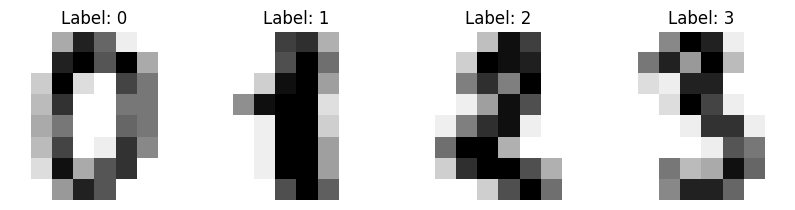

In [26]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

In [27]:
import pandas as pd

# Plotting function
matplotlib.rc('font', **{'family' : 'sans-serif',
                         'weight' : 'bold',
                         'size'   : 18})


def plot_mnist(X, y, X_embedded, min_dist=10.0):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(frameon=False)

    plt.setp(ax, xticks=(), yticks=())
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    plt.scatter(X_embedded[:, 0].reshape(-1,1), X_embedded[:, 1].reshape(-1,1), c=y.reshape(-1,1), marker='x')

    if min_dist is not None:
        from matplotlib import offsetbox
        shown_images = np.array([[15., 15.]])
        indices = np.arange(X_embedded.shape[0])
        random.shuffle(indices)
        for i in indices[:5000]:
            dist = np.sum((X_embedded[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist:
                continue
            shown_images = np.r_[shown_images, [X_embedded[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X[i].reshape(28, 28),
                                      cmap=cm.gray_r), X_embedded[i])
            ax.add_artist(imagebox)

In [28]:
X_train_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.001s...
[t-SNE] Computed neighbors for 1797 samples in 0.147s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 0.048769
[t-SNE] Computed conditional probabilities in 0.162s
[t-SNE] Iteration 50: error = 65.7914276, gradient norm = 0.0289109 (50 iterations in 0.965s)
[t-SNE] Iteration 100: error = 61.7787476, gradient norm = 0.0040071 (50 iterations in 0.871s)
[t-SNE] Iteration 150: error = 61.2644157, gradient norm = 0.0015726 (50 iterations in 1.397s)
[t-SNE] Iteration 200: error = 61.1042137, gradient norm = 0.0008374 (50 iterations in 2.124s)
[t-SNE] Iteration 250: error = 61.0354691, gradient norm = 0.0005603 (50 iterations in 1.247s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.035469
[t-SNE] Iteration 300: error = 1.1900555, gradient norm = 0.0195953 (50 iterations in 1.034s

MINST Dataset - Two-dimensional embedding of 70 000 handwritten digits with t-SNE


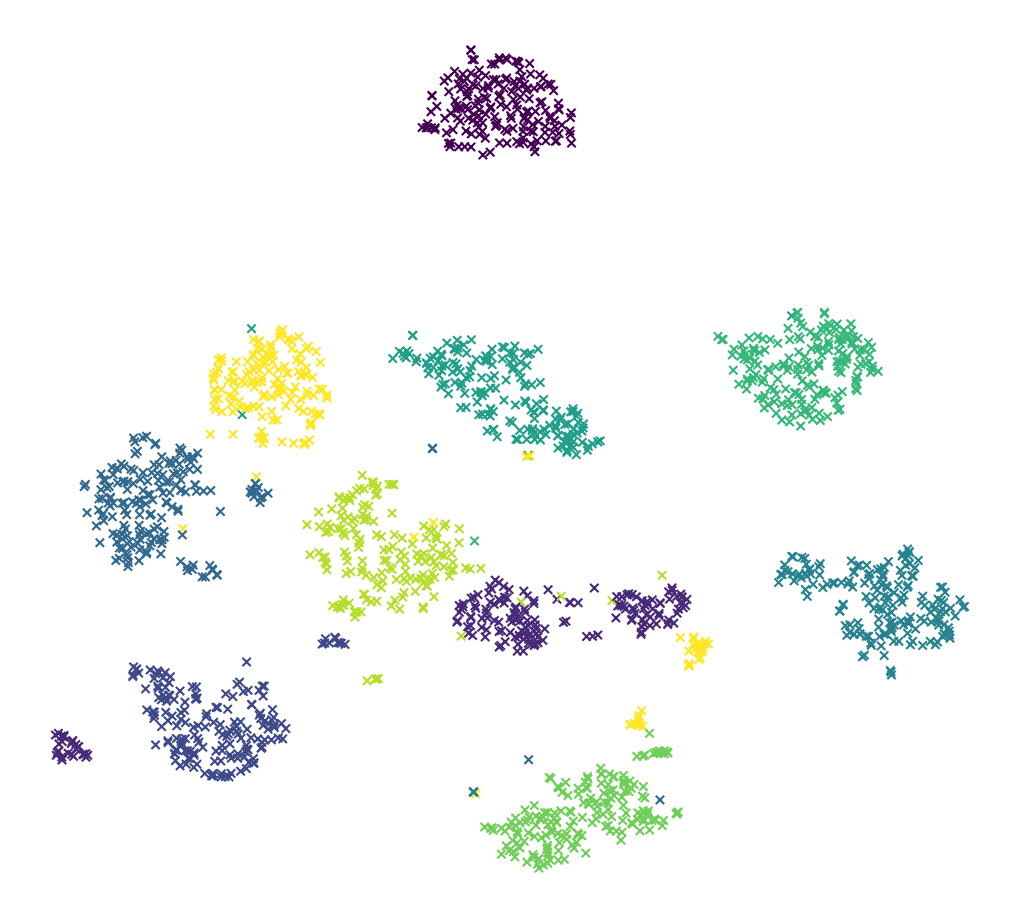

In [29]:
print("MINST Dataset - Two-dimensional embedding of 70 000 handwritten digits with t-SNE")
plot_mnist(X[indices[:n_train_samples]], y_train, X_train_embedded,
           min_dist=None)

# Outlook

There are some modifications of t-SNE that already have been published. A huge disadvantage of t-SNE is that it scales quadratically with the number of samples ($O(N^2)$) and the optimization is quite slow. These issues and more have been addressed in the following papers:

* Parametric t-SNE: [Learning a Parametric Embedding by Preserving Local Structure](http://jmlr.csail.mit.edu/proceedings/papers/v5/maaten09a/maaten09a.pdf)
* Barnes-Hut SNE: [Barnes-Hut-SNE](http://arxiv.org/abs/1301.3342)
* Fast optimization: [Fast Optimization for t-SNE](http://cseweb.ucsd.edu/~lvdmaaten/workshops/nips2010/papers/vandermaaten.pdf)

## Some Math behind t-SNE

t-SNE converts distances between data in the original space to probabilities.
At the end of the notebook you will find some math behind t-SNE, if you are interested.


First, we compute conditional probabilities

$$p_{j|i} = \frac{\exp{(-d(\boldsymbol{x}_i, \boldsymbol{x}_j) / (2 \sigma_i^2)})}{\sum_{i \neq k} \exp{(-d(\boldsymbol{x}_i, \boldsymbol{x}_k) / (2 \sigma_i^2)})}, \quad p_{i|i} = 0,$$

which will be used to generate joint probabilities

$$p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}.$$

The $\sigma_i$ will be determined automatically. This procedure can be influenced by setting the `perplexity` of the algorithm.

A heavy-tailed distribution will be used to measure the similarities in the embedded space

$$q_{ij} = \frac{(1 + ||\boldsymbol{y}_i - \boldsymbol{y}_j)||^2)^{-1}}{\sum_{k \neq l} (1 + ||\boldsymbol{y}_k - \boldsymbol{y}_l)||^2)^{-1}},$$

and then we minimize the Kullback-Leibler divergence

$$KL(P|Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}$$

between both distributions with gradient descent (and some tricks). Note that the cost function is not convex and multiple runs might yield different results.

More information can be found in these resources and in the documentation of t-SNE:

* Website (Implementations, FAQ, etc.): [t-Distributed Stochastic Neighbor Embedding](http://homepage.tudelft.nl/19j49/t-SNE.html)
* Original paper: [Visualizing High-Dimensional Data Using t-SNE](http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)